# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge on testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [1]:
!ls

CONTRIBUTING.md  index.ipynb  NYSE_monthly.csv	README.md
index_files	 LICENSE.md   passengers.csv


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Import `passengers.csv` and view the head.

In [4]:
# Read the dataset 'passengers.csv' and view the head
df = pd.read_csv("passengers.csv")
df.head()
# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [6]:
# Set month column as a timeseries object, and make it the index
df.Month = pd.to_datetime(df.Month)


AttributeError: 'DataFrame' object has no attribute 'Month'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
# check the head and the new index
print(df.index)
df.head()
# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Now that we have successfully created a TS object, we can use simple `plot()` function in pandas to visually inspect this time-series.

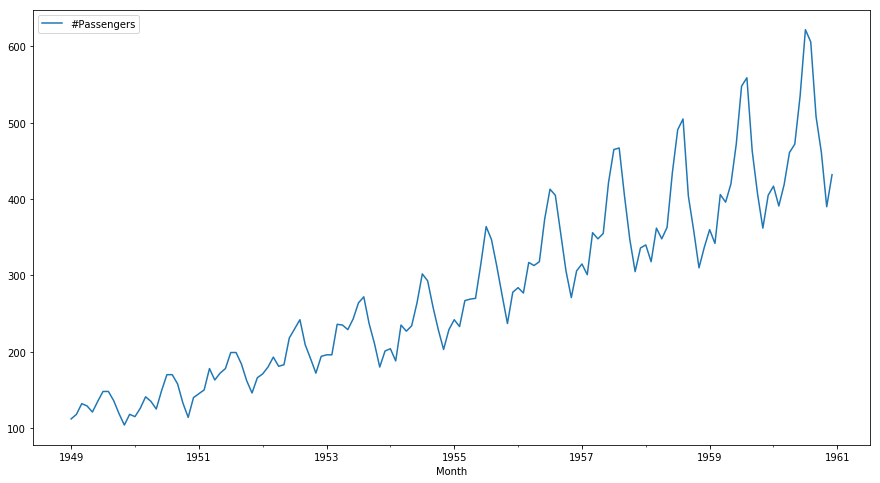

In [14]:
# Plot the time series data 
df.plot(figsize=(15,8));

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and 

## Rolling Statistics 

Use the `.rolling()` function to find rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [39]:
#Determine rolling statistics
df[roll_mean] = df["#Passengers"].rolling(window = 12, axis = 0).mean()
df[roll_std] = df["#Passengers"].rolling(window = 12, axis = 0).std()

df["#Passengers"].plot(figsize=(15,8), label = "original")

KeyError: '[         nan          nan          nan          nan          nan\n          nan          nan          nan          nan          nan\n          nan 126.66666667 126.91666667 127.58333333 128.33333333\n 128.83333333 129.16666667 130.33333333 132.16666667 134.\n 135.83333333 137.         137.83333333 139.66666667 142.16666667\n 144.16666667 147.25       149.58333333 153.5        155.91666667\n 158.33333333 160.75       162.91666667 165.33333333 168.\n 170.16666667 172.33333333 174.83333333 176.08333333 177.58333333\n 178.5        181.83333333 184.41666667 188.         190.08333333\n 192.5        194.66666667 197.         199.08333333 200.41666667\n 204.         208.5        212.33333333 214.41666667 217.25\n 219.75       222.08333333 223.75       224.41666667 225.\n 225.66666667 225.         224.91666667 224.25       224.66666667\n 226.41666667 229.58333333 231.33333333 233.16666667 234.66666667\n 236.58333333 238.91666667 242.08333333 245.83333333 248.5\n 252.         255.         259.25       264.41666667 268.91666667\n 273.33333333 277.08333333 279.91666667 284.         287.5\n 291.16666667 295.33333333 299.         303.         307.91666667\n 312.         316.83333333 320.41666667 323.08333333 325.91666667\n 328.25       330.83333333 332.83333333 336.08333333 339.\n 342.08333333 346.08333333 350.41666667 355.58333333 359.66666667\n 363.08333333 365.91666667 368.41666667 370.5        371.91666667\n 372.41666667 372.41666667 373.08333333 374.16666667 376.33333333\n 379.5        379.5        380.5        380.91666667 381.\n 382.66666667 384.66666667 388.33333333 392.33333333 397.08333333\n 400.16666667 404.91666667 409.41666667 414.33333333 418.33333333\n 422.66666667 428.33333333 433.08333333 437.16666667 438.25\n 443.66666667 448.         453.25       459.41666667 463.33333333\n 467.08333333 471.58333333 473.91666667 476.16666667] not in index'

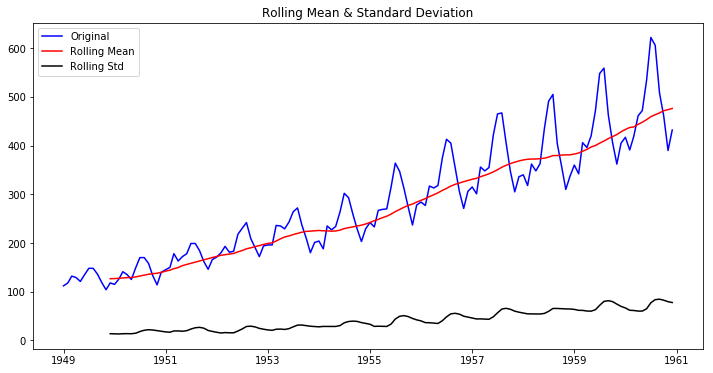

In [48]:
#Plot rolling statistics


Though the variation in standard deviation is small, mean is clearly increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [50]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:

# Extract and display test results in a user friendly manner

# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Conclusion here

## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

## Summary

In this lab, you learned to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!